# Elementary Stylometrics <br>
## Goals
**Process** Understanding how to measure and visualize stylistic similarity with computation.<br>
**Ethic** Exploring consequences of changing basic pre-processing steps for stylometric analysis.

In [1]:
#Code Cell 0
library(data.table)
library(tidyr)

## 1. Setting the Path to the Texts

In [1]:
# Code Cell 1
data_folder <- "corpus/"

## 2. Setting the Parameters
This is where you decide what to count and how much of it. <br>
## 2a. Choosing which features
Please type **between the quotation marks** either yes or no, all lowercase.<br>
A "yes" means that you want to treat the feature like a word. Punctuation will be replaced with "prd", "cma", "qst", or "excm" to make it easier to interpret (for humans). <br>
A "no" means that the feature will be erased from consideration.
## 2b. Choosing how many features
Please type a number (100 is the default). Do not use quotation marks.

In [33]:
# Code Cell 2a
numbers <- "no"
periods <- "yes"
commas <- "yes"
question_marks <- "yes"
exclamation_marks <- "yes"

In [34]:
path <- data_folder
filenames <- dir(path)

In [35]:
#Code Cell 3
titles <- character()
rawtitles <- filenames
for (i in 1:length(rawtitles)){
    workingfilename <- unlist(strsplit(rawtitles[i], split = "_"))
    workingarticlename <- paste(c(workingfilename[3]), collapse = "")
    remove_txt <- gsub("\\.txt", "", workingarticlename)
    clean_name <- gsub("\\.", " ", remove_txt)
    titles[i] <- clean_name
}

In [36]:
#Code Cell 4
docs <- as.character()
for (i in 1:length(filenames)){
    text <- scan(paste(data_folder, filenames[i], sep = "/"), what = "\n")
    docs[i] <- paste(text, collapse = " ")
}
docs <- gsub("[[:cntrl:]]", " ", docs)  # replace control characters with space
if(numbers == "no"){
    docs <- gsub("[[:digit:]]", "", docs) # remove numbers - replaces with blank
}
if(periods == "yes"){
    docs <- gsub("\\.", " prd ", docs) # replace period marks with "prd"
}
if(commas == "yes"){
    docs <- docs <- gsub("\\,", " cma ", docs) # replace commas with "cma"
}
if(question_marks == "yes"){
    docs <- gsub("\\?", " qst ", docs) # replace question marks with "qst"
}
if(exclamation_marks == "yes"){
    docs <- gsub("\\!", " exclm ", docs) # you see the pattern, right?
}

docs <- tolower(docs)

In [37]:
#Code Cell 5 - calc. relative freq. of words in each document
all_corpus_data <- list()

for (i in 1:length(docs)){
  split_all_text <- unlist(strsplit(docs[i], "\\W")) 
  clean_words = split_all_text[which(split_all_text != "")]
  #word_df <- as.data.frame(table(clean_words))
  word_df <- as.data.frame(100*table(clean_words)/length(clean_words))
  file_word_freq <- cbind(ID=titles[i], word_df)
  all_corpus_data[[i]] <- file_word_freq
}
corpus_data <- do.call(rbind, all_corpus_data)
colnames(corpus_data) = c("ID", "words", "Freq")
head(corpus_data)

,ID,words,Freq
,<chr>,<fct>,<dbl>
1,DULLES REVIEWS CIA HISTORY OUTLINES US INTELLIGENCE NET SAYS BARGHON INCIDENT TYPICAL OF RUSSIAN MISUNDERSTANDING,a,2.21169036
2,DULLES REVIEWS CIA HISTORY OUTLINES US INTELLIGENCE NET SAYS BARGHON INCIDENT TYPICAL OF RUSSIAN MISUNDERSTANDING,able,0.15797788
3,DULLES REVIEWS CIA HISTORY OUTLINES US INTELLIGENCE NET SAYS BARGHON INCIDENT TYPICAL OF RUSSIAN MISUNDERSTANDING,about,0.23696682
4,DULLES REVIEWS CIA HISTORY OUTLINES US INTELLIGENCE NET SAYS BARGHON INCIDENT TYPICAL OF RUSSIAN MISUNDERSTANDING,act,0.07898894
5,DULLES REVIEWS CIA HISTORY OUTLINES US INTELLIGENCE NET SAYS BARGHON INCIDENT TYPICAL OF RUSSIAN MISUNDERSTANDING,action,0.07898894
6,DULLES REVIEWS CIA HISTORY OUTLINES US INTELLIGENCE NET SAYS BARGHON INCIDENT TYPICAL OF RUSSIAN MISUNDERSTANDING,active,0.07898894


In [38]:
#Code Cell 6
final_df <- dcast(corpus_data, ID~words, fill = 0)
class(final_df)
dim(final_df)
final_df[,1:5] # row = document, col = word, values are relative freq (reshaped to match dist() requirements)

Warning message in dcast(corpus_data, ID ~ words, fill = 0):
“The dcast generic in data.table has been passed a data.frame and will attempt to redirect to the reshape2::dcast; please note that reshape2 is deprecated, and this redirection is now deprecated as well. Please do this redirection yourself like reshape2::dcast(corpus_data). In the next version, this warning will become an error.”
Using 'Freq' as value column. Use 'value.var' to override

Aggregation function missing: defaulting to length



[1] "data.frame"

[1]   75 6458

ID,a,able,about,act
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
15TH ANNUAL ROTC REVIEW HONORS TWO VIETNAM WAR DEATHS,1,0,0,0
A LESSON IN DIPLOMACY AMBASSADOR ROSENNE SPEAKS,1,1,1,0
A LETTER FROM VIETNAM,1,0,0,0
ADMINISTRATION ASSAILED ON PEACER FEELER REPORTS,1,0,1,0
AN EARFUL OF PROPAGANDA,1,0,0,0
ANNUAL CAMPUS CHEST WEEKEND WILL AID VIETNAMESE CHILDREN,1,0,0,0
ANTI ANTIWAR PARADE A SUBJECTIVE VIEW DEMONSTRATION SEEN AS HISTORICAL PARADOX,1,0,0,0
BOWDOIN SDS MARCHES IN NYC,1,0,0,0
BOWDOIN SDS PLANS APRIL PROTEST WEEK,1,0,0,0


In [39]:
#Code Cell 7
the_means <- colMeans(final_df[,-1])
max_cols <- 100
if(length(the_means) < max_cols){
  max_cols <- length(the_means)
}
keepers <- names(sort(the_means, decreasing = TRUE)[1:max_cols])
cluster_data <- final_df[,keepers]
row.names(cluster_data) <- final_df[,1]

In [40]:
#Code Cell 8
dm <- dist(cluster_data, method = "euclidean") #what are the options? 
#what is dm?

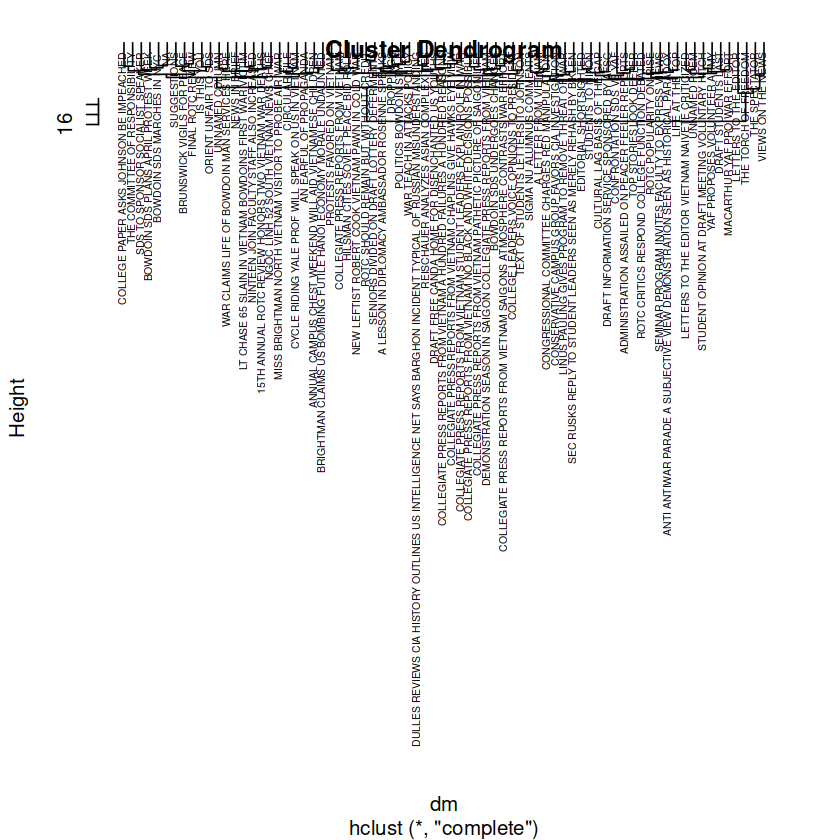

In [41]:
#Code Cell 9
hc <- hclust(dm) #what is hc?
plot(hc, hang = -1, cex = .5)

In [42]:
#Code Cell 10
pdf("InaugurationSubsetSimilarity.pdf", h = 10, w = 100)
plot(hc, hang = -1, cex = .5)
dev.off()

png 
  2